<a href="https://colab.research.google.com/github/Mbacanudo/Segmentacion_Clientes_Banco/blob/main/Segmentaci%C3%B3n_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Datos Personales

* **Nombre Completo**: Mario Eduardo Navarro Montero
* **Conjunto de datos**: BankChurners.csv

Este conjunto de datos consta de 10,000 clientes que mencionan su edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc

###Objetivo:

En base a las caracteristicas del dataset implementar un modelo de clusterización para segmentar clientes, en este caso 2, indicando posible abandono y permanencia e identificar las caracteristicas de cada uno de ellos.

###Diccionario de datos:

|               Column               |                                                      Description                                                      |   |
|:----------------------------------:|:---------------------------------------------------------------------------------------------------------------------:|---|
| CLIENTNUM                          | Client number. Unique identifier for the customer holding the account                                                 |   |
| Attrition_Flag                     | Internal event (customer activity) variable - if the account is closed then 1 else 0                                  |   |
| Customer_Age                       | Demographic variable - Customer's Age in Years                                                                        |   |
| Gender                             | Demographic variable - M=Male, F=Female                                                                               |   |
| Dependent_count                    | Demographic variable - Number of dependents                                                                           |   |
| Education_Level                    | Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.) |   |
| Marital_Status                     | Demographic variable - Married, Single, Divorced, Unknown                                                             |   |
| Income_Category                    | Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >   |   |
| Card_Category                      | Product Variable - Type of Card (Blue, Silver, Gold, Platinum)                                                        |   |
| Months_on_book                     | Period of relationship with bank                                                                                      |   |
| Total_Relationship_count           | Total no. of products held by the customer                                                                            |   |
| Months_Inactive_12_mon             | No. of months inactive in the last 12 months                                                                          |   |
| Contacts_Count_12_mon              | No. of Contacts in the last 12 months                                                                                 |   |
| Credit_Limit                       | Credit Limit on the Credit Card                                                                                       |   |
| Total_Revolving_Bal                | Total Revolving Balance on the Credit Card                                                                            |   |
| Avg_Open_To_Buy                    | Open to Buy Credit Line (Average of last 12 months)                                                                   |   |
| Total_Amt_Chng_Q4_Q1               | Change in Transaction Amount (Q4 over Q1)                                                                             |   |
| Total_Trans_Amt                    | Total Transaction Amount (Last 12 months)                                                                             |   |
| Total_Trans_Ct                     | Total Transaction Count (Last 12 months)                                                                              |   |
| Total_Ct_Chng_Q4_Q1                | Change in Transaction Count (Q4 over Q1)                                                                              |   |
| Avg_Utilization_Ratio              | Average Card Utilization Ratio                                                                                        |   |
| Naive_Bayes_Classifier_attribution | Naive Bayes                                                                                                           |   |
| Naive_Bayes_Classifier_attribution | Naive Bayes                                                                                                           |   |

In [ ]:
# Importación de Librerías

import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, r2_score, mean_absolute_error, mean_squared_error, roc_auc_score, RocCurveDisplay, roc_curve, auc, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# Importación de conjunto de datos

pd.options.display.max_columns = None
file = "/content/BankChurners.csv"
df = pd.read_csv(file)#, index_col="CLIENTNUM")

# Visualización de los datos importados
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#I.- Análisis Exploratorio

##Parte 1: Información general del conjunto de datos:

Dentro del conjunto de datos, hay dos columnas que no serán utilizadas, ya que se refieren a clasificadores probabilísticos y no son relevantes para los objetivos de este proyecto.

In [ ]:
# Eliminación de las columnas no utilizadas.
df.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], inplace=True)

In [ ]:
# Visualización de Información del conjunto de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
print("------------------------------------------------------\n")
print("Información relevante:\n")
print(f"Número de columnas: {df.shape[1]}\n")
print(f"Número de filas: {df.shape[0]}\n")
print(f"Número de elementos duplicados: {df.duplicated().sum()}\n")
print(f"Número de valores nulos: {df.isna().sum().sum()}\n")
print("------------------------------------------------------")

------------------------------------------------------

Información relevante:

Número de columnas: 21

Número de filas: 10127

Número de elementos duplicados: 0

Número de valores nulos: 0

------------------------------------------------------


##Parte 2: Información estadistica general del conjunto de datos:

In [ ]:
df.describe(include=["int64", "float64"])

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
df.describe(include="object")
print("Columnas tipo ""object""",":","\n")
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())
    print("-"*50)

Columnas tipo object : 

Attrition_Flag
['Existing Customer' 'Attrited Customer']
--------------------------------------------------
Gender
['M' 'F']
--------------------------------------------------
Education_Level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
--------------------------------------------------
Marital_Status
['Married' 'Single' 'Unknown' 'Divorced']
--------------------------------------------------
Income_Category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
--------------------------------------------------
Card_Category
['Blue' 'Gold' 'Silver' 'Platinum']
--------------------------------------------------


Observamos que en las columnas 'Education_Level', 'Marital_Status' e 'Income_Category' se encuentran valores etiquetados como 'Unknown'. En este contexto, consideraremos estos valores como equivalentes a valores nulos en el conjunto de datos. Para comprender mejor su impacto, calcularemos el porcentaje de registros en los que se presentan estos valores en cada una de las columnas mencionadas.

In [ ]:
def valores_nulos(df, column):
    return df.loc[df[column] == "Unknown", [column]].shape[0] / df.shape[0]


print("Porcentaje de valores Unknown en cada caracteristica: ", "\n")

for column in df.columns:
    print(column, ": " , round((valores_nulos(df, column)*100), 4), "%")

Porcentaje de valores Unknown en cada caracteristica:  

CLIENTNUM :  0.0 %
Attrition_Flag :  0.0 %
Customer_Age :  0.0 %
Gender :  0.0 %
Dependent_count :  0.0 %
Education_Level :  14.9995 %
Marital_Status :  7.3961 %
Income_Category :  10.9805 %
Card_Category :  0.0 %
Months_on_book :  0.0 %
Total_Relationship_Count :  0.0 %
Months_Inactive_12_mon :  0.0 %
Contacts_Count_12_mon :  0.0 %
Credit_Limit :  0.0 %
Total_Revolving_Bal :  0.0 %
Avg_Open_To_Buy :  0.0 %
Total_Amt_Chng_Q4_Q1 :  0.0 %
Total_Trans_Amt :  0.0 %
Total_Trans_Ct :  0.0 %
Total_Ct_Chng_Q4_Q1 :  0.0 %
Avg_Utilization_Ratio :  0.0 %


Aunque estos valores constituyen aproximadamente el 15% del conjunto de datos, optaremos por mantenerlos en el conjunto de datos.

La columna 'CLIENTNUM' es un identificador único asignado a cada cliente. Comprobaremos la cantidad de identificadores únicos frente al total de filas en el conjunto de datos, así como la presencia de identificadores duplicados.

In [ ]:
print("-"*45,"\n")
print("Total de cuentas: ", df["CLIENTNUM"].count(), "\n")
print("ID's unicas de clientes: ", df["CLIENTNUM"].nunique(),"\n")
print("Número de clientes duplicados: ", df["CLIENTNUM"].duplicated().sum(), "\n")
print("-"*45)

--------------------------------------------- 

Total de cuentas:  10127 

ID's unicas de clientes:  10127 

Número de clientes duplicados:  0 

---------------------------------------------


Podemos observar que la cantidad de identificadores únicos (clientes únicos) coincide con el número total de filas y que no hay identificadores duplicados en el conjunto de datos

**Conclusiones Intermedias**:
- El conjunto de datos se encuentra en general limpio y contiene características relevantes. La columna "CLIENTNUM" sirve como identificador único de cada cliente, y tras una revisión previa, confirmamos que cada fila representa un cliente único en el conjunto. Además, la columna "Attrition_Flag" es crucial, ya que indica si el cliente permanece o ha abandonado el banco.

- Se identifican varias columnas de tipo "object", la mayoría de las cuales, excepto la columna "Género", proporcionan información categórica de tipo ordinal. Estas características serán útiles para aplicar la técnica de preprocesamiento de datos "LabelEncoder". En el caso de la columna "Género", aplicaremos "OneHotEncoder" para evitar la generación de una representación dispersa (sparse) debido a que se trata de una sola columna categórica.

- El conjunto de datos también incluye características numéricas, que serán útiles para realizar un análisis estadístico más profundo, como veremos a continuación:

##Parte 3: Análisis de Características



###Categoría de ingresos por nivel de educación

Analizamos la distribución de los niveles educativos en distintos grupos de ingresos y luego normalizamos las frecuencias para representarlas como porcentajes relativos. Esta visualización nos permite entender la relación proporcional entre la educación y los ingresos.

In [ ]:
#df.groupby("Income_Category")["Education_Level"].value_counts()
#df["Income_Category"].unique()
#df["Education_Level"].unique()

column_values = ["Unknown", "Uneducated", "High School", "College", "Graduate", "Post-Graduate", "Doctorate"]
index_values = ["Unknown", "Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]
IncomeEd = pd.DataFrame(index = index_values, columns = column_values)
for income in index_values:
    incomeCount = df.loc[df["Income_Category"] == income, ["Education_Level"]].value_counts()
    for column in column_values:
        IncomeEd.loc[income, column] = incomeCount[column]

IncomeEd

,Unknown,Uneducated,High School,College,Graduate,Post-Graduate,Doctorate
Unknown,145,185,225,108,332,47,70
Less than $40K,556,522,671,345,1139,170,158
$40K - $60K,269,249,355,183,553,111,70
$60K - $80K,210,195,307,132,422,77,59
$80K - $120K,219,217,308,175,478,81,57
$120K +,120,119,147,70,204,30,37


In [ ]:
for column in IncomeEd.columns:
    IncomeEd[column] = IncomeEd[column] / IncomeEd[column].sum()
IncomeEd

,Unknown,Uneducated,High School,College,Graduate,Post-Graduate,Doctorate
Unknown,0.095458,0.124412,0.111773,0.106614,0.106138,0.091085,0.155211
Less than $40K,0.36603,0.351042,0.333333,0.340573,0.36413,0.329457,0.350333
$40K - $60K,0.17709,0.167451,0.176354,0.180652,0.17679,0.215116,0.155211
$60K - $80K,0.138249,0.131137,0.152509,0.130306,0.13491,0.149225,0.13082
$80K - $120K,0.144174,0.145931,0.153005,0.172754,0.152813,0.156977,0.126386
$120K +,0.078999,0.080027,0.073025,0.069102,0.065217,0.05814,0.08204


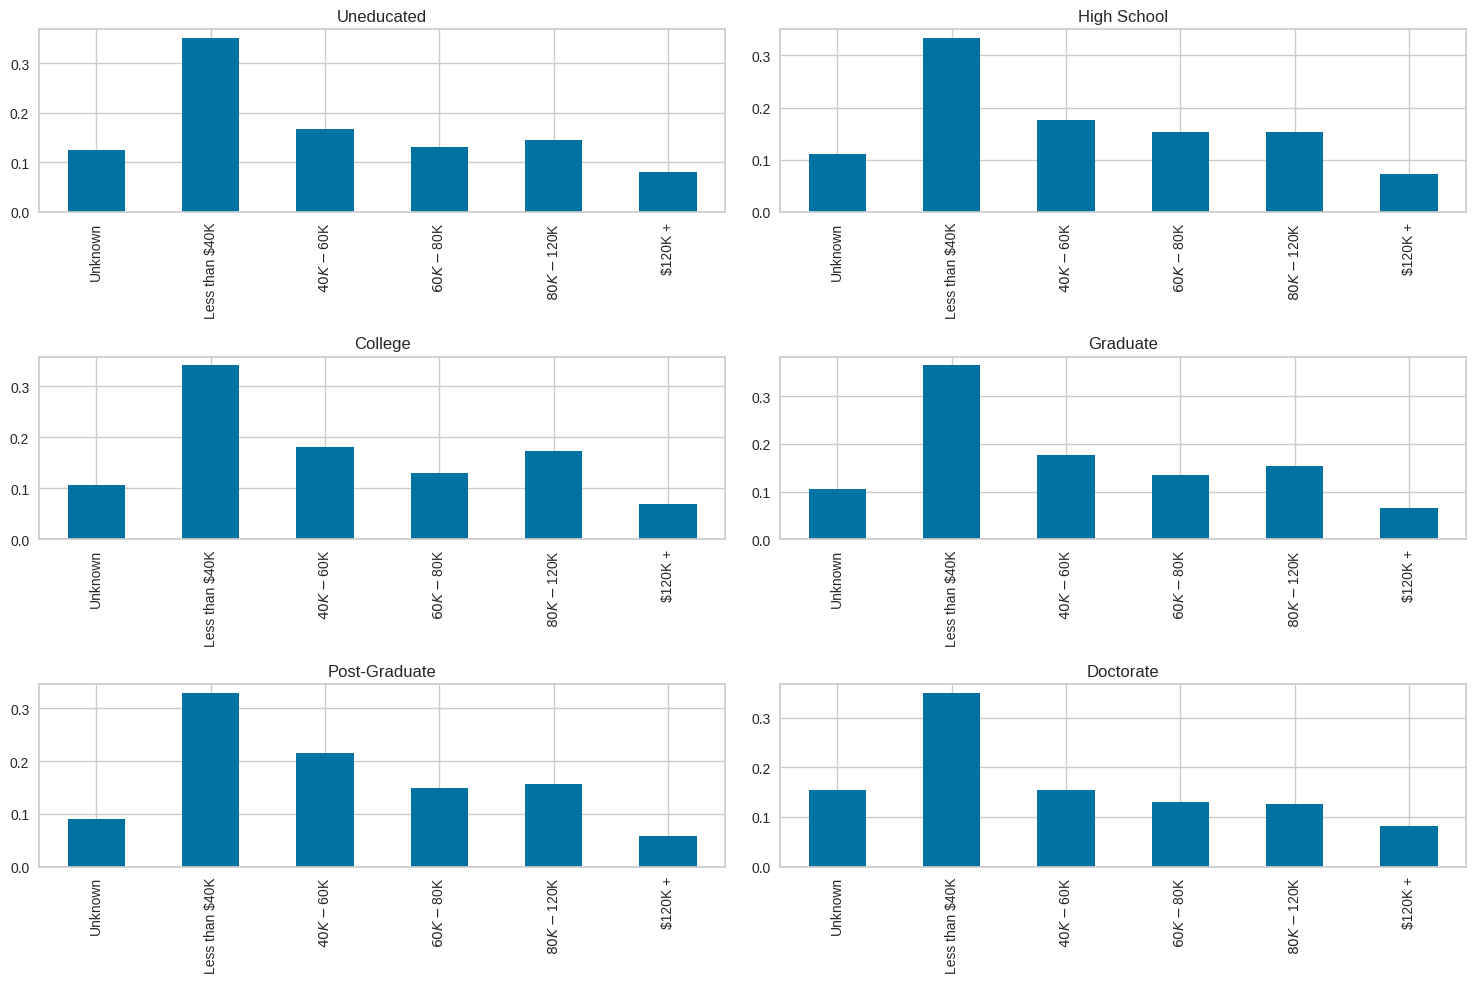

In [ ]:
# Crear una figura y subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Crear gráficos para cada nivel educativo
IncomeEd["Uneducated"].plot(kind="bar", ax=axes[0, 0])
axes[0, 0].set_title("Uneducated")

IncomeEd["High School"].plot(kind="bar", ax=axes[0, 1])
axes[0, 1].set_title("High School")

IncomeEd["College"].plot(kind="bar", ax=axes[1, 0])
axes[1, 0].set_title("College")

IncomeEd["Graduate"].plot(kind="bar", ax=axes[1, 1])
axes[1, 1].set_title("Graduate")

IncomeEd["Post-Graduate"].plot(kind="bar", ax=axes[2, 0])
axes[2, 0].set_title("Post-Graduate")

IncomeEd["Doctorate"].plot(kind="bar", ax=axes[2, 1])
axes[2, 1].set_title("Doctorate")

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

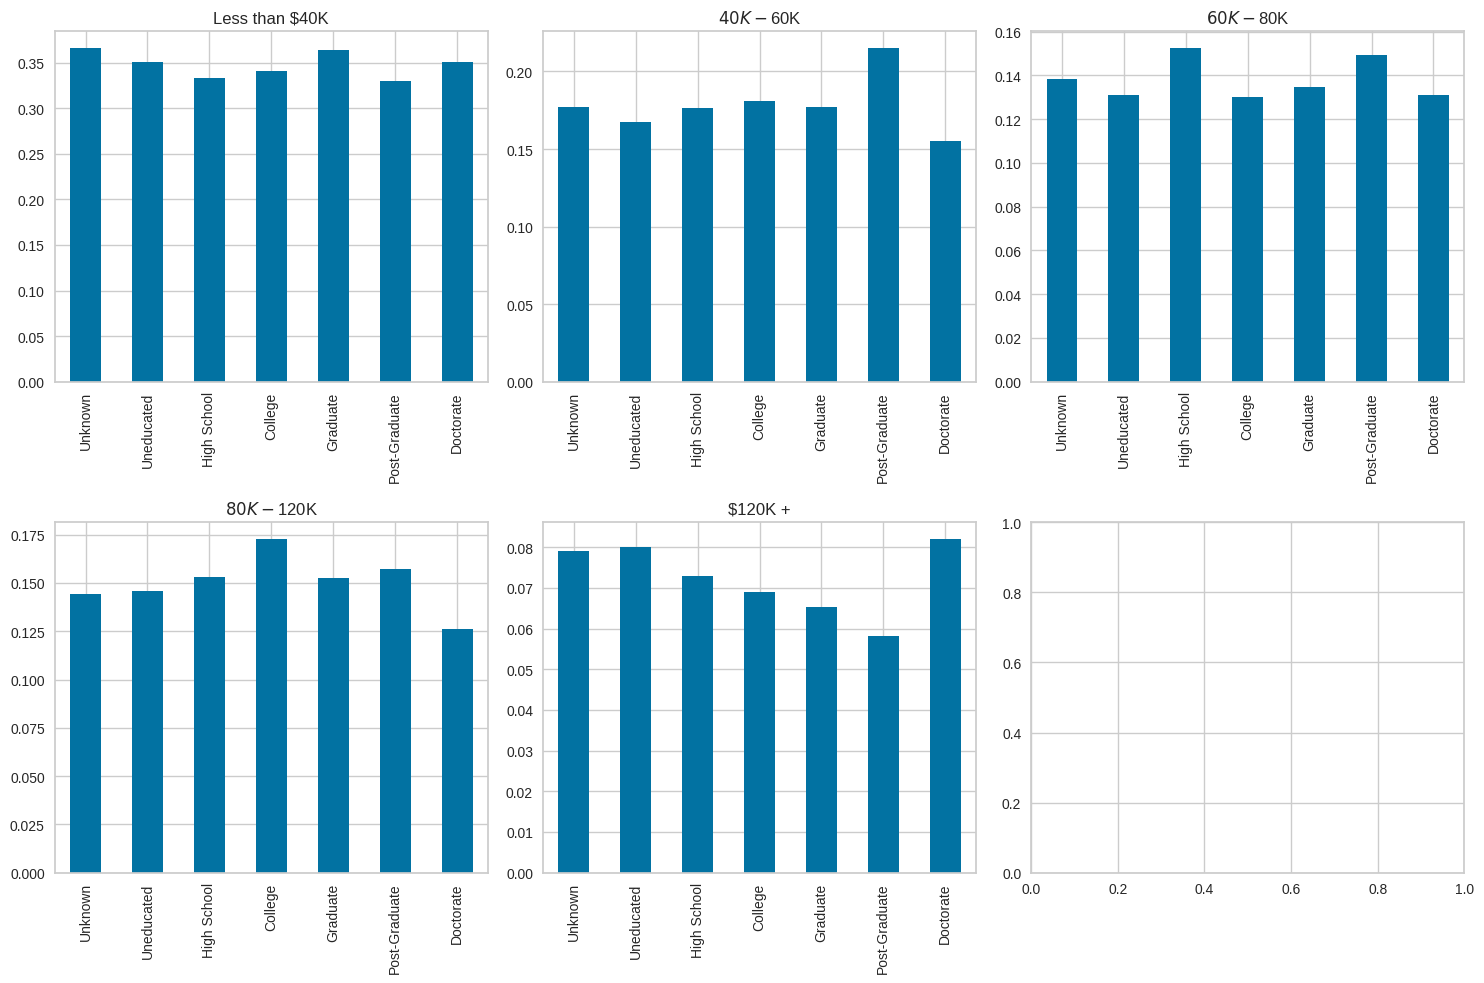

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Nombres de los grupos de ingresos
income_groups = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]

# Iterar sobre los grupos de ingresos y crear gráficos de barras en subplots
for i, income_group in enumerate(income_groups):
    row = i // 3
    col = i % 3
    IncomeEd.loc[income_group, :].plot(kind="bar", ax=axes[row, col])
    axes[row, col].set_title(income_group)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Conclusiones Intermedias**:

- Podemos observar en los datos una tendencia a obtener un salario más alto a medida que se realizan estudios más avanzados, donde los graduados de postgrado son los mejor remunerados. Es interesante mencionar que el título de doctorado parece tener una remuneración similar a la de las personas sin educación formal. También es interesante destacar que la proporción más alta de personas que se encuentran en el rango salarial más alto incluye a aquellos sin educación formal y a los titulados con doctorado.

###Categoría de ingresos por género

In [ ]:
#df.groupby("Income_Category")["Gender"].value_counts()
#df["Income_Category"].unique()
#df["Gender"].unique()

column_values = ["M", "F"]
index_values = ["Unknown", "Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]
IncomeGen = pd.DataFrame(index = index_values, columns = column_values)

for income in index_values:
    incomeCount = df.loc[df["Income_Category"] == income, ["Gender"]].value_counts()
    #print(incomeCount)
    for column in column_values:
        try:
            IncomeGen.loc[income, column] = incomeCount[column]
        except KeyError:
            IncomeGen.loc[income, column] = 0

IncomeGen

,M,F
Unknown,52,1060
Less than $40K,277,3284
$40K - $60K,776,1014
$60K - $80K,1402,0
$80K - $120K,1535,0
$120K +,727,0


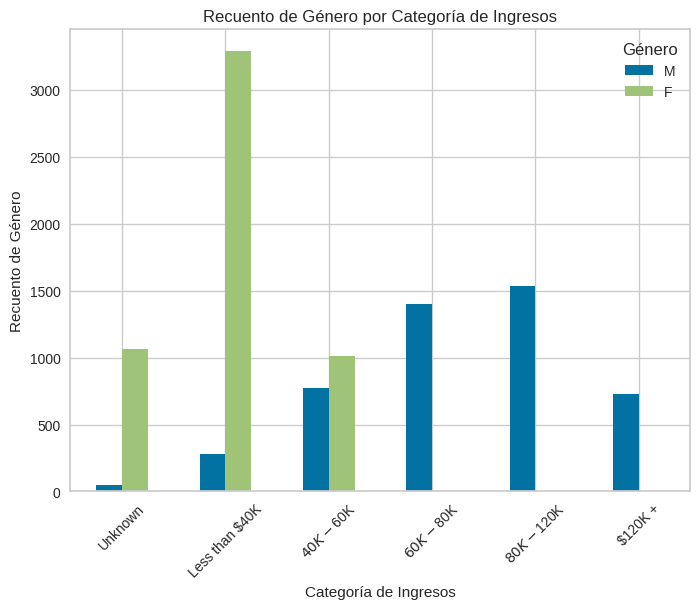

In [ ]:
IncomeGen.plot(kind="bar", figsize=(8, 6))
plt.xlabel("Categoría de Ingresos")
plt.ylabel("Recuento de Género")
plt.title("Recuento de Género por Categoría de Ingresos")
plt.legend(title="Género")
plt.xticks(rotation=45)
plt.show()

**Conclusiones Intermedias**:

- Podemos que la mayoría de los clientes masculinos están ganando salarios superiores a 60.000, mientras que todas las clientes femeninas están ganando salarios inferiores a 60.000.

###Rotación de clientes

In [ ]:
column_values = ["M", "F"]
index_values = ["Existing Customer", "Attrited Customer"]
RotacionGen = pd.DataFrame(index = index_values, columns = column_values)
for index in index_values:
    valueCount = df.loc[df["Attrition_Flag"] == index, ["Gender"]].value_counts()
    for column in column_values:
        try:
            RotacionGen.loc[index, column] = valueCount[column]
        except KeyError:
            RotacionGen.loc[index, column] = 0

print(RotacionGen)

for column in RotacionGen.columns:
    RotacionGen[column] = RotacionGen[column] / RotacionGen[column].sum()
print(RotacionGen)

                      M     F
Existing Customer  4072  4428
Attrited Customer   697   930
                          M         F
Existing Customer  0.853848  0.826428
Attrited Customer  0.146152  0.173572


In [ ]:
# Calcular el porcentaje de género que es más propenso a dejar de ser cliente
attrited_customers = RotacionGen.loc["Attrited Customer"]
total_attrited = attrited_customers.sum()

# Calcular el porcentaje de género en comparación con el total
porcentaje_rotacion_por_genero = (attrited_customers / total_attrited) * 100

print(porcentaje_rotacion_por_genero)

tasa_abandono = round(0.173572 / 0.146152 - 1, 3)
print(f"La tasa de abandono es del {tasa_abandono * 100}%")


M    45.711933
F    54.288067
Name: Attrited Customer, dtype: object
La tasa de abandono es del 18.8%


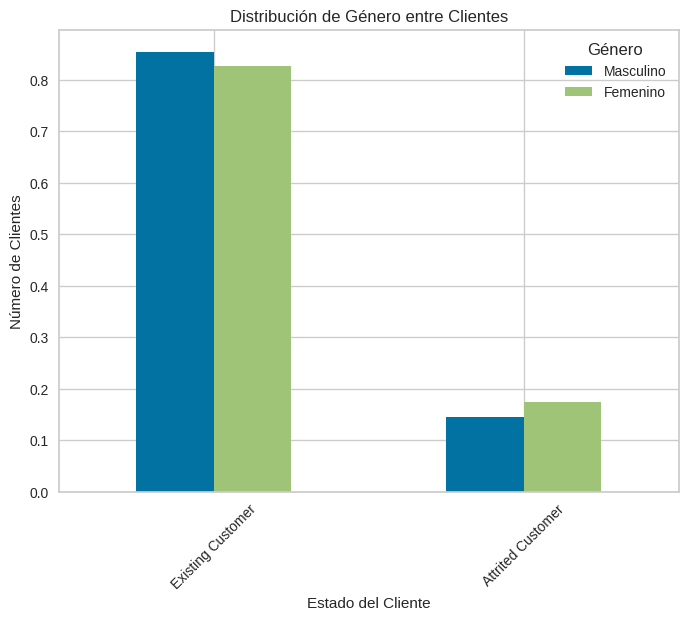

In [ ]:
# Crear un gráfico de barras
RotacionGen.plot(kind="bar", figsize=(8, 6))

# Establecer etiquetas y título
plt.xlabel("Estado del Cliente")
plt.ylabel("Número de Clientes")
plt.title("Distribución de Género entre Clientes")
plt.xticks(rotation=45)

# Establecer leyendas para las barras
plt.legend(title="Género", labels=["Masculino", "Femenino"])

# Mostrar el gráfico
plt.show()

**Conclusiones Intermedias**:

- Este análisis inicial indica, en términos proporcionales, que las mujeres tienen una tasa ligeramente más alta de abandono en comparación con los hombres.

- Esto sugiere que, en el conjunto de datos analizado, las mujeres tienden a abandonar el banco a una tasa ligeramente superior en comparación con los hombres.

###Análisis de Total_Trans_Amt (Monto Total de Transacciones (Últimos 12 meses))

In [ ]:
df["Total_Trans_Amt"].sum()

44600182

In [ ]:
df.groupby("Gender")["Total_Trans_Amt"].sum()

Gender
F    23169697
M    21430485
Name: Total_Trans_Amt, dtype: int64

In [ ]:
#df.groupby(["Gender", "Income_Category"])["Total_Trans_Amt"].sum()
column_values = ["M", "F"]
index_values = ["Unknown", "Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]
IncomeTotalAmt = pd.DataFrame(index=index_values, columns=column_values)

for income in index_values:
    for gender in column_values:
        TotalAmtCount = df.loc[(df["Income_Category"] == income) & (df["Gender"] == gender), ["Total_Trans_Amt"]].sum()
        IncomeTotalAmt.loc[income, gender] = TotalAmtCount.iloc[0] if not TotalAmtCount.empty else 0

IncomeTotalAmt

,M,F
Unknown,178748,4583071
Less than $40K,1289975,14248164
$40K - $60K,3547596,4338462
$60K - $80K,6239899,0.0
$80K - $120K,6881344,0.0
$120K +,3292923,0.0


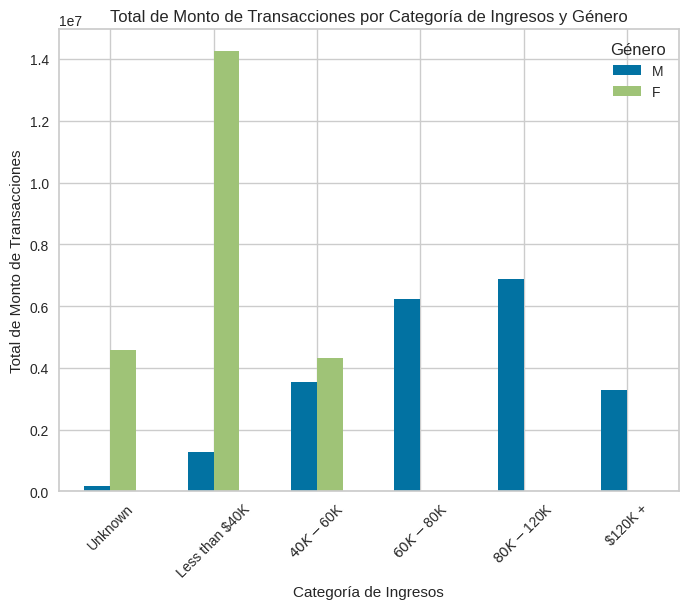

In [ ]:
# Graficar los datos
IncomeTotalAmt.plot(kind="bar", figsize=(8, 6))
plt.xlabel("Categoría de Ingresos")
plt.ylabel("Total de Monto de Transacciones")
plt.title("Total de Monto de Transacciones por Categoría de Ingresos y Género")
plt.legend(title="Género")
plt.xticks(rotation=45)
plt.show()

**Conclusiones Intermedias**:

- Los datos indican que en las categorías "$60K - $80K", "$80K - $120K" y "$120K +", los montos de transacciones son principalmente registrados por hombres, mientras que en otras categorías, las mujeres tienen un monto total de transacciones más alto.

###Análisis de Total_Trans_Ct (Recuento Total de Transacciones (Últimos 12 meses))


In [ ]:
df["Total_Trans_Ct"].sum()

656824

In [ ]:
df.groupby("Gender")["Total_Trans_Ct"].sum()

Gender
F    355516
M    301308
Name: Total_Trans_Ct, dtype: int64

In [ ]:
column_values = ["M", "F"]
index_values = ["Unknown", "Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]
IncomeTransCount = pd.DataFrame(index=index_values, columns=column_values)

for income in index_values:
    for gender in column_values:
        TotalTransCount = df.loc[(df["Income_Category"] == income) & (df["Gender"] == gender), ["Total_Trans_Ct"]].sum()
        IncomeTransCount.loc[income, gender] = TotalTransCount.iloc[0] if not TotalTransCount.empty else 0

IncomeTransCount

,M,F
Unknown,3132,70539
Less than $40K,17743,217834
$40K - $60K,49208,67143
$60K - $80K,88673,0.0
$80K - $120K,96239,0.0
$120K +,46313,0.0


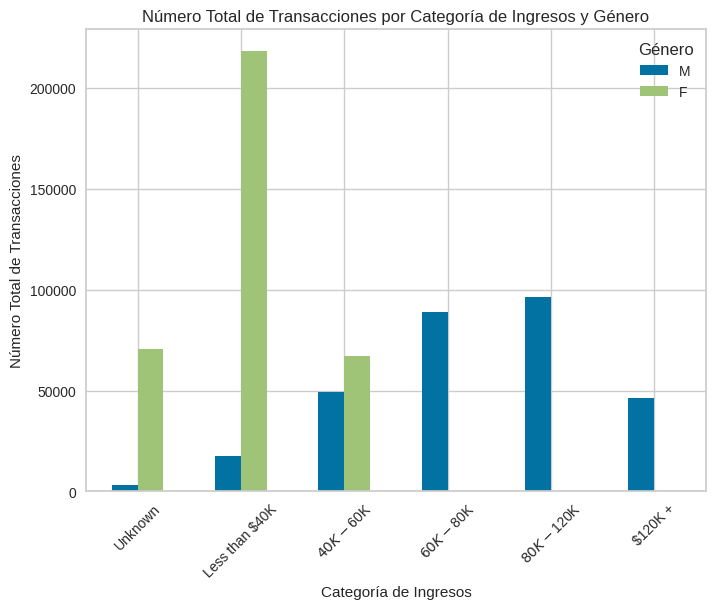

In [ ]:
# Graficar los datos
IncomeTransCount.plot(kind="bar", figsize=(8, 6))
plt.xlabel("Categoría de Ingresos")
plt.ylabel("Número Total de Transacciones")
plt.title("Número Total de Transacciones por Categoría de Ingresos y Género")
plt.legend(title="Género")
plt.xticks(rotation=45)
plt.show()

**Conclusiones Intermedias**:

- Los datos indican que en las categorías "$60K - $80K", "$80K - $120K" y "$120K +", las transacciones son principalmente realizadas por hombres, mientras que en las categorías "Unknown", "Less than $40K" y "$40K - $60K", las mujeres tienen una mayor cantidad de transacciones.

###Análisis de Total_Relationship_Count (Número total de productos que posee el cliente)

In [ ]:
column_values = ["M", "F"]

# Usar groupby para agrupar por 'Income_Category' y 'Gender' y calcular el total de 'Total_Relationship_count'
IncomeRelationCT = df.groupby("Gender")["Total_Relationship_Count"].sum()

# Reordenar las columnas en el orden deseado
IncomeRelationCT = IncomeRelationCT[column_values]
IncomeRelationCT

Gender
M    18207
F    20403
Name: Total_Relationship_Count, dtype: int64

In [ ]:
column_values = ["M", "F"]
index_values = ["Unknown", "Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]
IncomeRelationCT = pd.DataFrame(index=index_values, columns=column_values)

for income in index_values:
    for gender in column_values:
        TotalRelCount = df.loc[(df["Income_Category"] == income) & (df["Gender"] == gender), ["Total_Relationship_Count"]].sum()
        IncomeRelationCT.loc[income, gender] = TotalRelCount.iloc[0] if not TotalRelCount.empty else 0

IncomeRelationCT

,M,F
Unknown,212,4030
Less than $40K,1080,12535
$40K - $60K,2934,3838
$60K - $80K,5375,0.0
$80K - $120K,5859,0.0
$120K +,2747,0.0


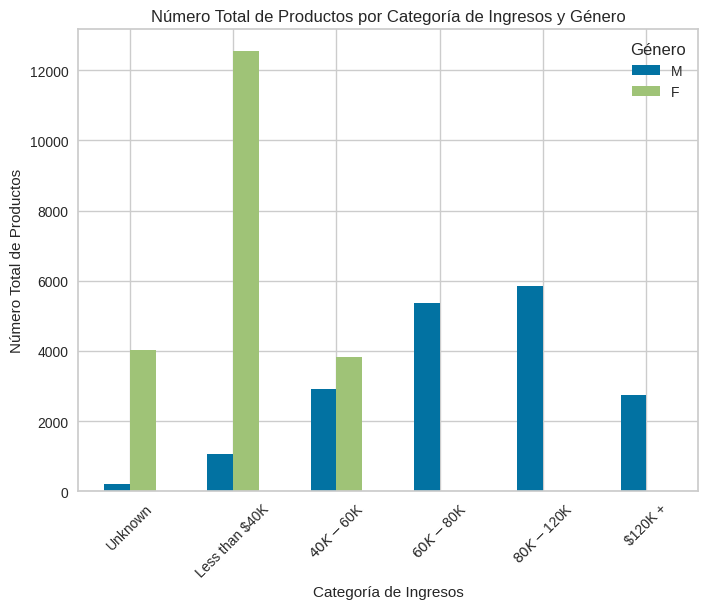

In [ ]:
# Graficar los datos
IncomeRelationCT.plot(kind="bar", figsize=(8, 6))
plt.xlabel("Categoría de Ingresos")
plt.ylabel("Número Total de Productos")
plt.title("Número Total de Productos por Categoría de Ingresos y Género")
plt.legend(title="Género")
plt.xticks(rotation=45)
plt.show()

In [ ]:
promedio_por_genero = df.groupby("Gender")["Customer_Age"].mean()
print(promedio_por_genero)

Gender
F    46.456887
M    46.178863
Name: Customer_Age, dtype: float64


**Conclusiones Intermedias**:

- En general, los hombres tienden a tener más productos financieros en las categorías de ingresos más altas, mientras que las mujeres tienen más productos financieros en las categorías de ingresos más bajas y en la categoría "Unknown".

###Análisis de proporción de deuda según el nivel de ingreso

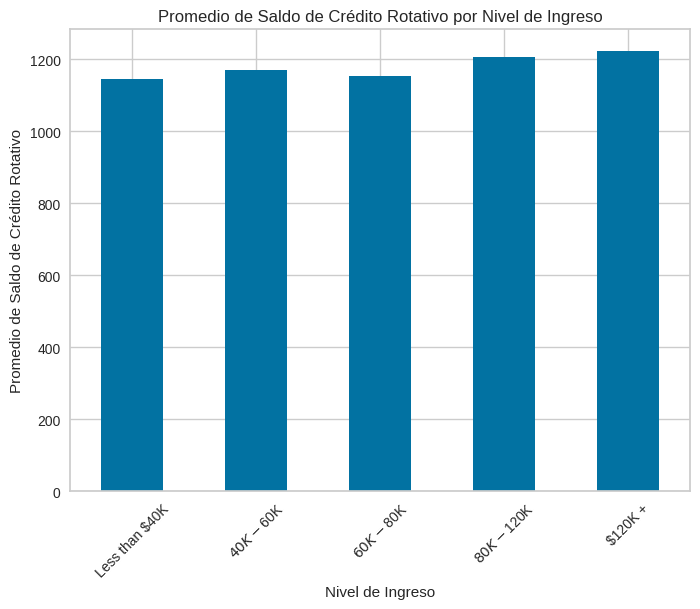

In [ ]:
# Definir las proporciones para normalizar
proporciones = {
    "Less than $40K": 20,
    "$40K - $60K": 50,
    "$60K - $80K": 70,
    "$80K - $120K": 100,
    "$120K +": 140
}

# Calcular los promedios
income_levels = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]
dept_means_income = df.groupby("Income_Category")["Total_Revolving_Bal"].mean().reindex(income_levels)

# Crear gráfico de barras para promedios
plt.figure(figsize=(8, 6))
dept_means_income.plot(kind="bar")
plt.xlabel("Nivel de Ingreso")
plt.ylabel("Promedio de Saldo de Crédito Rotativo")
plt.title("Promedio de Saldo de Crédito Rotativo por Nivel de Ingreso")
plt.xticks(rotation=45)
plt.show()

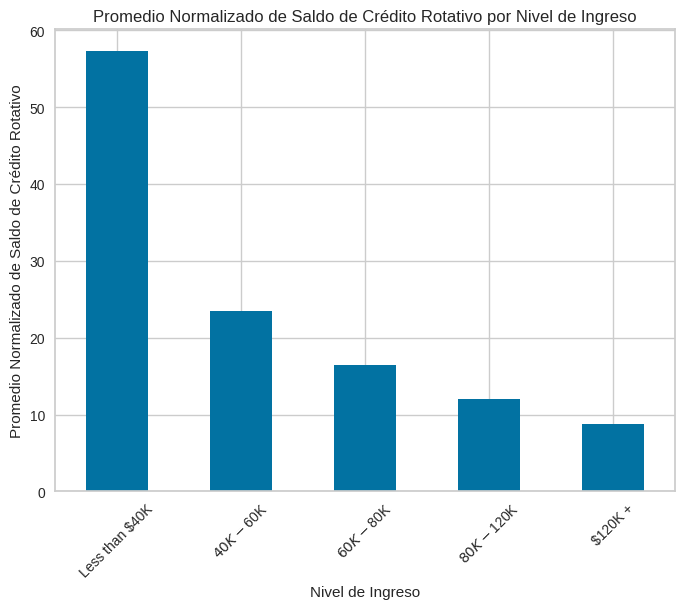

In [ ]:
# Calcular los promedios normalizados
dept_means_income_proporcional = dept_means_income / dept_means_income.index.map(proporciones)

# Crear gráfico de barras para promedios normalizados
plt.figure(figsize=(8, 6))
dept_means_income_proporcional.plot(kind='bar')
plt.xlabel("Nivel de Ingreso")
plt.ylabel("Promedio Normalizado de Saldo de Crédito Rotativo")
plt.title("Promedio Normalizado de Saldo de Crédito Rotativo por Nivel de Ingreso")
plt.xticks(rotation=45)
plt.show()

**Conclusiones Intermedias**:

- A partir del análisis, se observa que existe una pequeña tendencia en la que mayores ingresos se asocian con valores de crédito rotativo más altos. Sin embargo, esta tendencia no necesariamente implica una menor responsabilidad financiera. Para obtener una perspectiva más precisa, se realizó una normalización dividiendo la media del saldo de crédito rotativo por el valor medio de los ingresos. Esta normalización reveló una tendencia clara: a medida que aumentan los ingresos, el valor del crédito rotativo disminuye en medidas proporcionales.


#II.- Modelos

Para el modelado, hemos elegido utilizar el algoritmo KMeans. Nuestro objetivo es segmentar los datos en dos clusters, donde cada cluster representará si el cliente permanece o abandona el banco.

A pesar de que estamos realizando un modelo no supervisado, hemos decidido mantener la columna "Attrition_Flag" dentro del modelo. Esto se debe a que, aunque no estamos realizando un modelo de clasificación supervisada, la columna "Attrition_Flag" contiene información valiosa sobre la permanencia o el abandono de los clientes, y deseamos que el modelo tenga en cuenta esta información durante la segmentación.

##Parte 1: Preprocesamiento de datos

In [ ]:
# Eliminar ID cliente del df ya que no tiene relevancia alguna para el objetivo

df.drop(columns = "CLIENTNUM", inplace=True)

# OneHotEncoding para "Gender"
gender_encoder = OneHotEncoder(sparse=False)
gender_encoded = gender_encoder.fit_transform(df[["Gender"]])

# Label Encoder para "Attrition_Flag"
label_encoder_attrition = LabelEncoder()
df["Attrition_Flag"] = label_encoder_attrition.fit_transform(df["Attrition_Flag"])

# Label Encoder para las demas columnas categoricas
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=["object"]).columns
categorical_columns = [col for col in categorical_columns if col != "Attrition_Flag"]
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Union
X = pd.concat([pd.DataFrame(gender_encoded, columns=gender_encoder.get_feature_names_out(["Gender"])),
               df.drop(["Gender"], axis=1)], axis=1)

# Estandarizado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Nombres de las características originales
feature_names = X.columns

# PCA con varianza del 90%
variance_threshold = 0.90
pca = PCA(n_components=variance_threshold)
X_pca = pca.fit_transform(X_scaled)

# Varianzas explicadas por cada componente principal
explained_variance = pca.explained_variance_ratio_

# DF con varianzas explicadas y nombres de características
variance_df = pd.DataFrame({"Componente Principal": range(1, len(explained_variance) + 1),
                            "Varianza Explicada": explained_variance})

# Asignar nombres de características originales a las componentes principales correspondientes
variance_df["Nombre de Característica"] = [feature_names[i] for i in range(len(explained_variance))]

# Visualizar la varianza explicada por cada componente con nombres
print("Varianza Explicada por Componente Principal:")
print(variance_df)

# Características excluidas PCA
excluded_features = [feature for feature in feature_names if feature not in variance_df["Nombre de Característica"].tolist()]

# Calcular la varianza de las características excluidas por el PCA
variance_excluded_features = [np.var(X_scaled[:, feature_names.tolist().index(feature)]) for feature in excluded_features]

# DF con las características excluidas
excluded_features_df = pd.DataFrame({"Nombre de Característica": excluded_features})

# Pesos de las características originales en el primer y segundo componente principal
weights_cp1 = pca.components_[0]
weights_cp2 = pca.components_[1]

# DF con los pesos y nombres de las características originales
weights_df = pd.DataFrame({"Característica Original": feature_names, "Peso en CP1": weights_cp1, "Peso en CP2": weights_cp2})

# DF ordenado por peso CP1
weights_df_cp1 = weights_df.sort_values(by="Peso en CP1", ascending=False)
print("\nPesos en el Componente Principal 1:")
print(weights_df_cp1)

# DF ordenado por peso CP2
weights_df_cp2 = weights_df.sort_values(by="Peso en CP2", ascending=False)
print("\nPesos en el Componente Principal 2:")
print(weights_df_cp2)



Varianza Explicada por Componente Principal:
    Componente Principal  Varianza Explicada  Nombre de Característica
0                      1            0.169413                  Gender_F
1                      2            0.110901                  Gender_M
2                      3            0.091264            Attrition_Flag
3                      4            0.086428              Customer_Age
4                      5            0.067063           Dependent_count
5                      6            0.060054           Education_Level
6                      7            0.050122            Marital_Status
7                      8            0.048572           Income_Category
8                      9            0.047511             Card_Category
9                     10            0.046756            Months_on_book
10                    11            0.044356  Total_Relationship_Count
11                    12            0.041721    Months_Inactive_12_mon
12                    13        

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


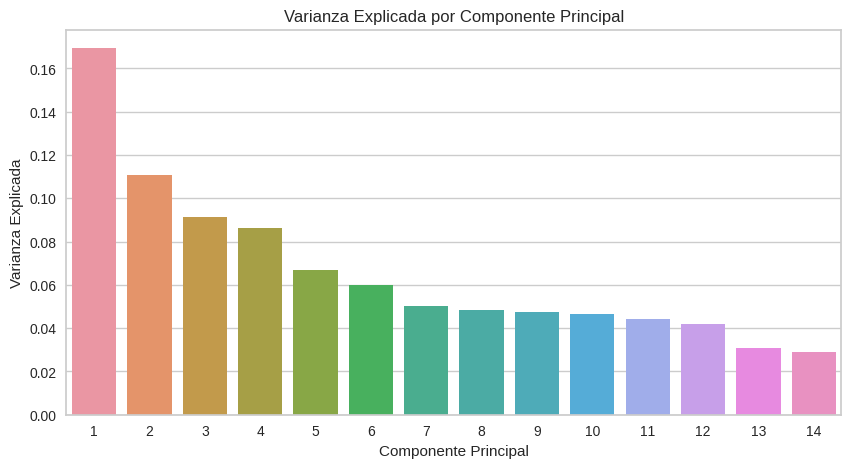

In [ ]:
# Varianza explicada por cada componente principal
plt.figure(figsize=(10, 5))
sns.barplot(x="Componente Principal", y="Varianza Explicada", data=variance_df)
plt.title("Varianza Explicada por Componente Principal")
plt.xlabel("Componente Principal")
plt.ylabel("Varianza Explicada")
plt.show()

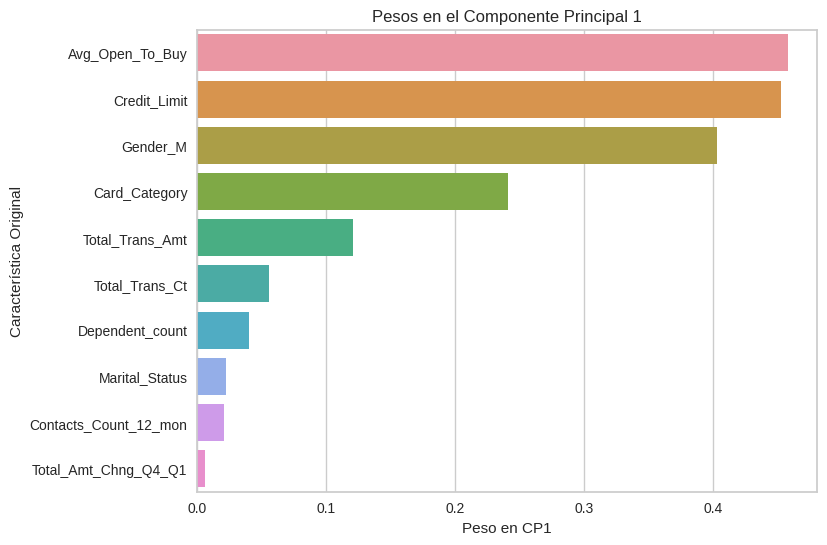

In [ ]:
# Pesos en el Componente Principal 1
plt.figure(figsize=(8, 6))
sns.barplot(x="Peso en CP1", y="Característica Original", data=weights_df_cp1.head(10))
plt.title("Pesos en el Componente Principal 1")
plt.xlabel("Peso en CP1")
plt.ylabel("Característica Original")
plt.show()


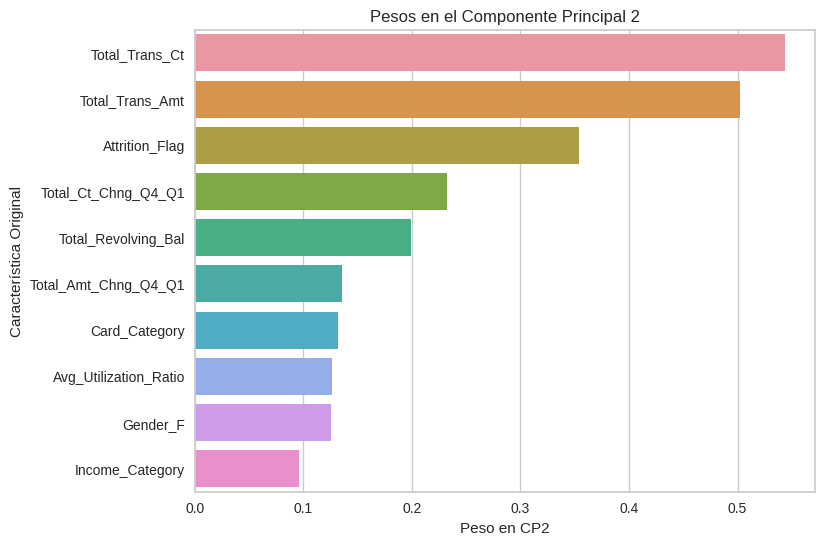

In [ ]:
# Pesos en el Componente Principal 2
plt.figure(figsize=(8, 6))
sns.barplot(x="Peso en CP2", y="Característica Original", data=weights_df_cp2.head(10))
plt.title("Pesos en el Componente Principal 2")
plt.xlabel("Peso en CP2")
plt.ylabel("Característica Original")
plt.show()

**Conclusiones Intermedias**:

- El código anterior realiza la preparación de datos, reducción de dimensionalidad mediante PCA por un 90% y visualización de la varianza explicada y los pesos de las características en los primeros dos componentes principales.

- Se aplicó OneHotEncoder a la columna "Gender" debido a su naturaleza binaria, lo que resultó en una representación sin valores dispersos (sparse).

- Para las demás columnas categóricas, se utilizó LabelEncoder para asignar valores numéricos que reflejan un orden de importancia en lugar de una representación binaria.

## Parte 2: K-Means

In [ ]:
# Realizar el clustering con 2 clústeres debido a que queremos demostrar la permanencia y el abandono segun las caracteristicas del DF
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_pca)

# Etiquetas de los clúster
cluster_labels = kmeans.labels_

# Agregar las etiquetas de clúster al DF original
df["Cluster_Label"] = cluster_labels

# Comparar con la columna "Attrition_Flag" para identificar qué clúster indica abandono o permanencia
cluster_0 = df[df["Cluster_Label"] == 0]
cluster_1 = df[df["Cluster_Label"] == 1]

if cluster_0["Attrition_Flag"].mean() > cluster_1["Attrition_Flag"].mean():
    cluster_abandono = 0
    cluster_permanencia = 1
else:
    cluster_abandono = 1
    cluster_permanencia = 0

print("\nCluster que indica abandono:", cluster_abandono)
print("Cluster que indica permanencia:", cluster_permanencia)

# Calcular el porcentaje de "Attrition_Flag" en el dataset original
total_customers = len(df)
porcentaje_actual_abandono = (df["Attrition_Flag"] == 0).sum() / total_customers * 100
porcentaje_actual_permanencia = (df["Attrition_Flag"] == 1).sum() / total_customers * 100

# Calcular el porcentaje de clasificación del modelo en cada clúster
cluster_0_porcentaje = (cluster_0["Attrition_Flag"] == 0).sum() / len(cluster_0) * 100
cluster_1_porcentaje = (cluster_1["Attrition_Flag"] == 1).sum() / len(cluster_1) * 100

# Calcular el porcentaje de clientes que no fueron clasificados en ningún clúster
no_clasificados = 100 - (cluster_0_porcentaje + cluster_1_porcentaje)

# Mostrar los resultados
print("\nPorcentaje de 'Attrition_Flag' en el dataset original:")
print(f"Abandono: {porcentaje_actual_abandono:.2f}%")
print(f"Permanencia: {porcentaje_actual_permanencia:.2f}%")

print("\nPorcentaje de clasificación del modelo en cada clúster:")
print(f"Cluster {cluster_abandono} (Abandono predicho): {cluster_0_porcentaje:.2f}%")
print(f"Cluster {cluster_permanencia} (Permanencia predicha): {cluster_1_porcentaje:.2f}%")

print("\nPorcentaje de clientes no clasificados en ningún clúster:")
print(f"No clasificados: {no_clasificados:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster que indica abandono: 0
Cluster que indica permanencia: 1

Porcentaje de 'Attrition_Flag' en el dataset original:
Abandono: 16.07%
Permanencia: 83.93%

Porcentaje de clasificación del modelo en cada clúster:
Cluster 0 (Abandono predicho): 14.59%
Cluster 1 (Permanencia predicha): 82.57%

Porcentaje de clientes no clasificados en ningún clúster:
No clasificados: 2.83%


**Conclusiones Intermedias**:

- Este código realiza un proceso de clustering para identificar patrones de abandono y permanencia en el banco en función de las características de los clientes. Luego, compara los resultados del modelo con los datos reales para evaluar su rendimiento.

##Parte 3: Visualización

El objetivo es obtener una representación visual de cómo se agrupan los clientes en función al abandono y permanencia real v/s los resultados de la clusterización.

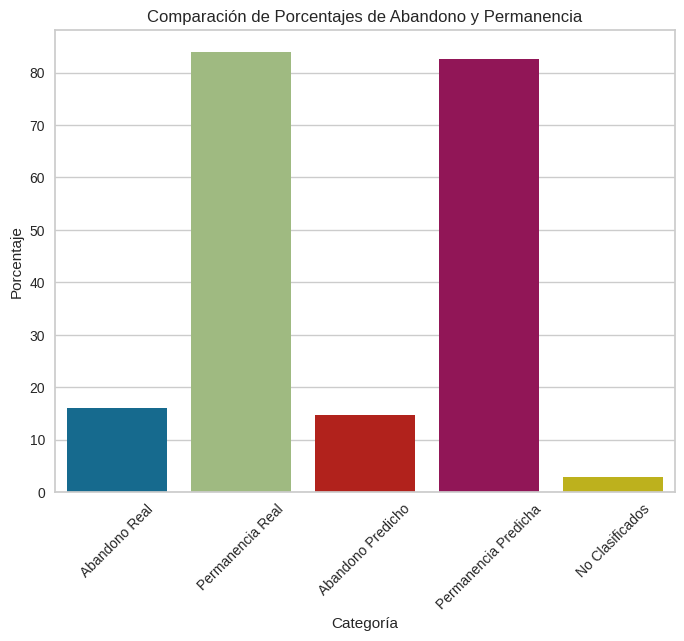

In [ ]:
# Visualizar la comparación entre los porcentajes reales y predichos de "Attrition_Flag"
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=["Abandono Real", "Permanencia Real", "Abandono Predicho", "Permanencia Predicha", "No Clasificados"],
                      y=[porcentaje_actual_abandono, porcentaje_actual_permanencia, cluster_0_porcentaje, cluster_1_porcentaje, no_clasificados])

plt.title("Comparación de Porcentajes de Abandono y Permanencia")
plt.xlabel("Categoría")
plt.ylabel("Porcentaje")
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)
plt.show()

##Parte 4: Conclusiones del modelo

In [ ]:
#Agrupa el DF por cluster y agrega los valores medios
cluster_groups = df.groupby("Cluster_Label", as_index=False).mean()

# Mostrar el DF con los valores promedio por cluster
print("Valores promedio por cluster:")
cluster_groups

Valores promedio por cluster:


,Cluster_Label,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,0.854060,46.139774,0.975540,2.360946,3.097020,1.466804,2.022199,0.298253,35.854060,3.795683,2.321891,2.500925,13084.226783,1186.006578,11898.220206,0.766895,4564.806578,63.588900,0.711276,0.193035
1,1,0.825732,46.498100,0.004371,2.332573,3.096161,1.460281,3.642151,0.070315,35.997149,3.828202,2.358989,2.413151,4515.589472,1141.371342,3374.218130,0.753511,4255.491828,66.032687,0.713097,0.350576


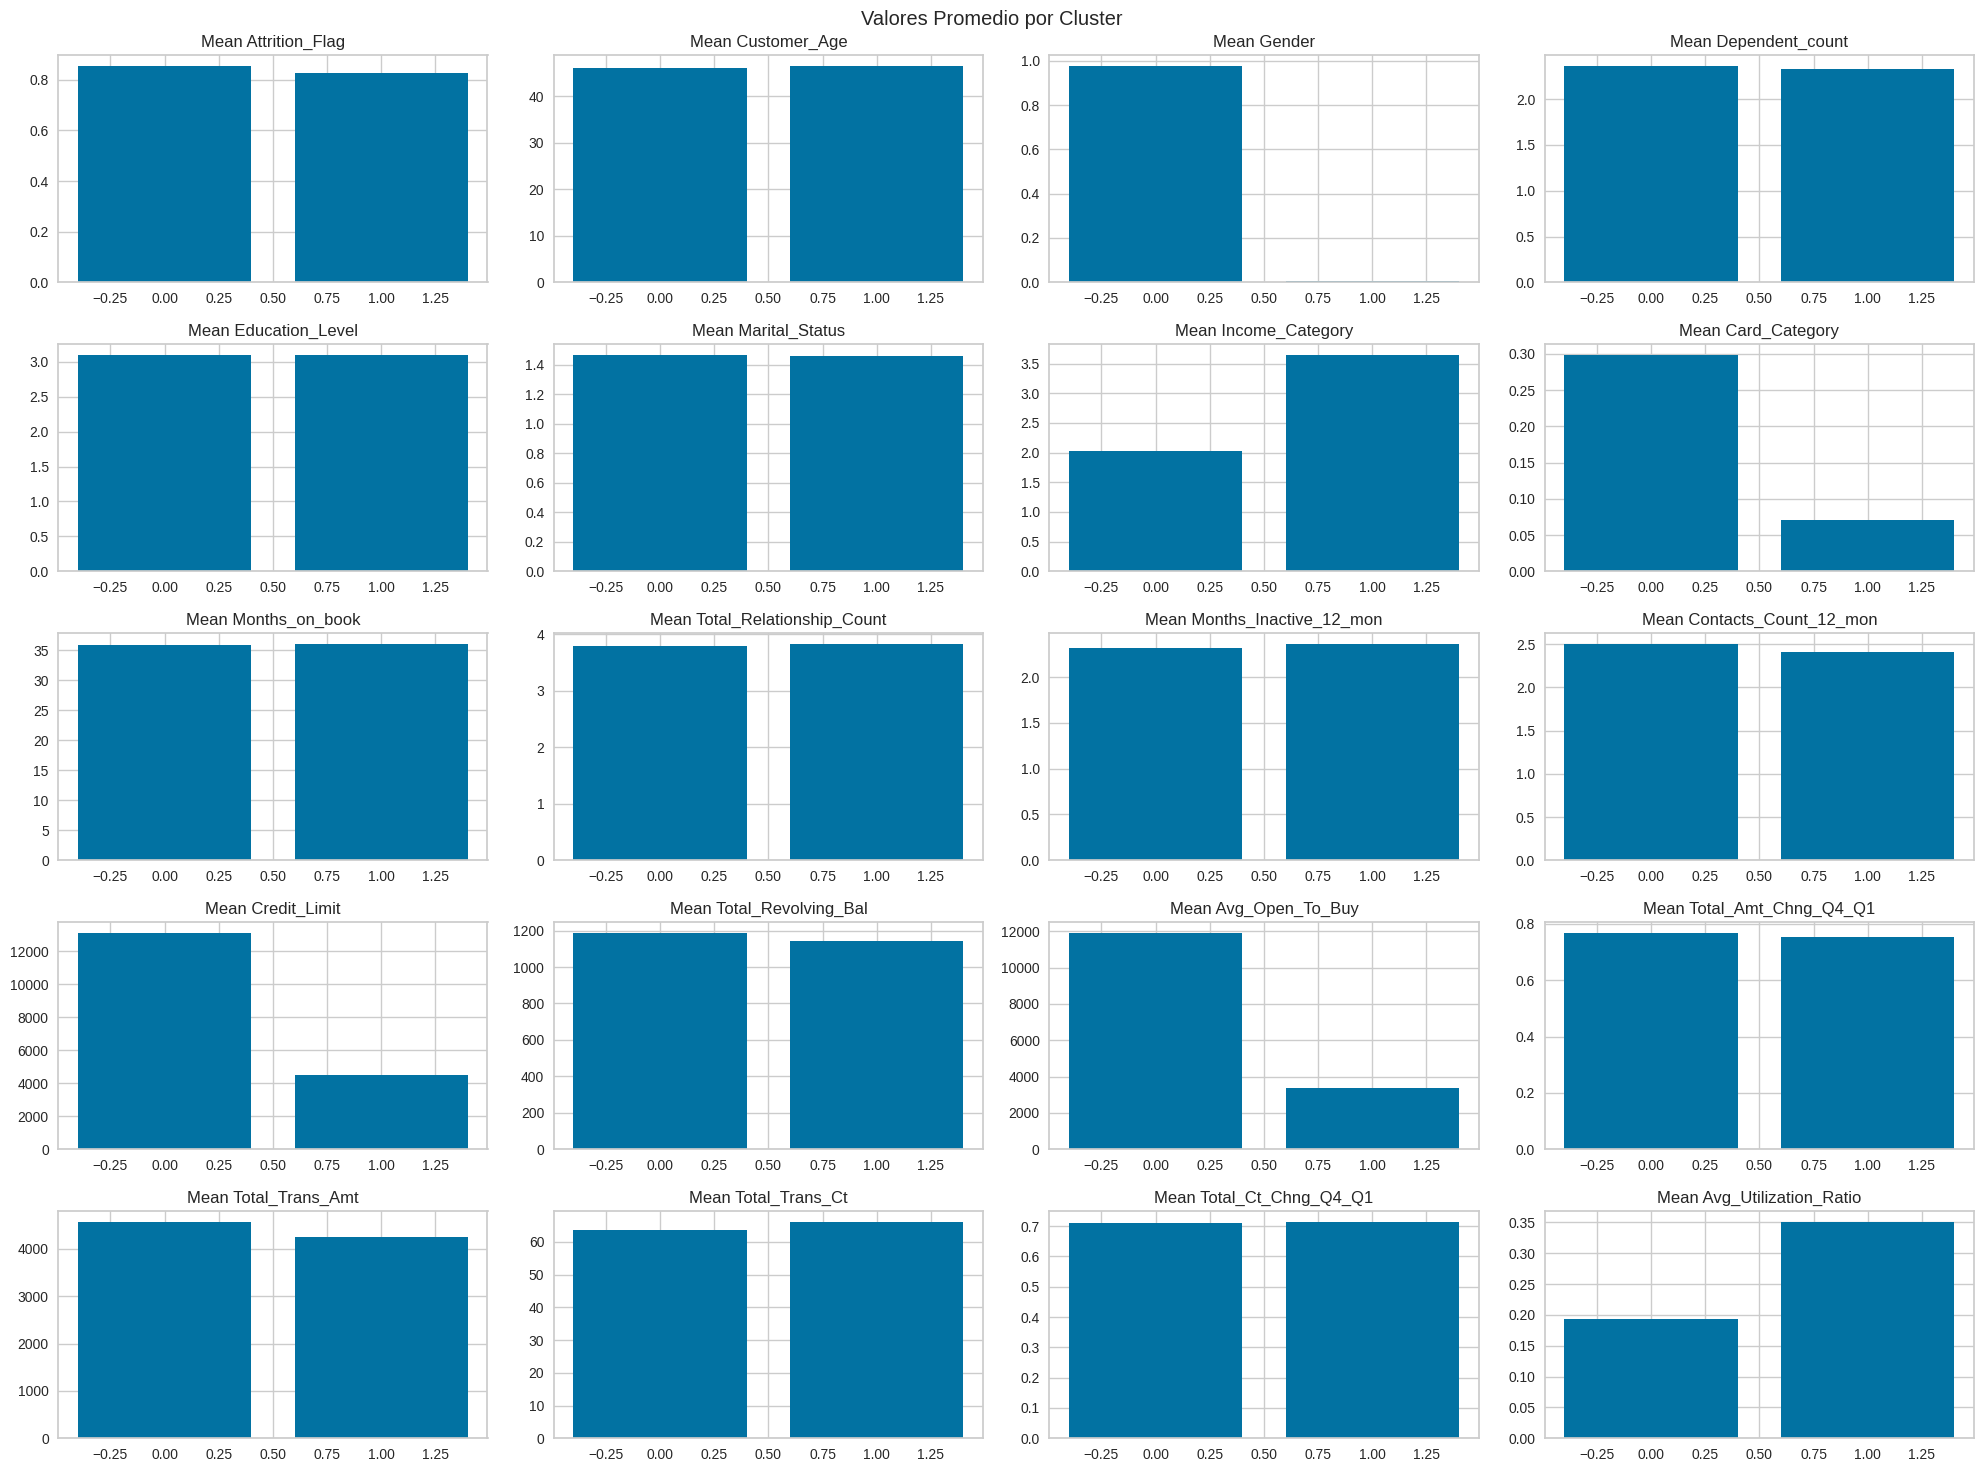

In [ ]:
# Visualización
fig, axes = plt.subplots(5, 4, figsize=(20, 15))
axes = axes.ravel()

# Columnas a visualizar
columns_to_plot = cluster_groups.columns[1:22]

# Loop de visualización
for i, col in enumerate(columns_to_plot):
    axes[i].bar(cluster_groups["Cluster_Label"], cluster_groups[col])
    axes[i].set_title(f"Mean {col}")

# Titulo
plt.suptitle("Valores Promedio por Cluster")


plt.tight_layout()
plt.show()

##Parte 5: Conclusiones finales de resultados del modelo

##Cluster 0 (Posible Permanencia en el Banco):

- Género: Principalmente género masculino (Hombres).
- Edad del Cliente: Edad promedio de aproximadamente 46.13 años.
- Número de Dependientes: Un promedio de alrededor de 2.36 dependientes.
- Nivel de Educación: Educación promedio de nivel 3.09 (moderada).
- Estado Civil: Principalmente casados o en relaciones estables.
- Ingresos: Ingresos moderados a altos.
- Límite de Crédito: Límite de crédito promedio de alrededor de 13,084.
- Utilización de Crédito: Relativamente alta, con un promedio de alrededor del 71.1%.
- Número de Meses en el Banco: Un promedio de alrededor de 35.85 meses.
- Número Total de Productos de Relación: Alrededor de 3.79 productos en promedio.
- Número de Meses Inactivos en los Últimos 12 Meses: Alrededor de 2.32 meses en promedio.
- Número de Contactos en los Últimos 12 Meses: Alrededor de 2.50 contactos en promedio.
- Cambios en el Total de Montos en los Últimos 12 Meses: Alrededor del 76.7% en promedio.
- Monto Total de Transacciones: Alrededor de 4,566.36 en promedio.
- Total de Transacciones por Mes: Alrededor de 63.59 en promedio.
- Cambio en el Total de Transacciones por Mes en los Últimos 12 Meses: Alrededor del 19.3% en promedio.

##Cluster 1 (Posible Abandono del Banco):

- Género: Principalmente género femenino (Mujeres).
- Edad del Cliente: Edad promedio de aproximadamente 46.51 años.
- Número de Dependientes: Un promedio de alrededor de 2.33 dependientes.
- Nivel de Educación: Educación promedio de nivel 3.10 (moderada).
- Estado Civil: Principalmente casados o en relaciones estables.
- Ingresos: Ingresos moderados.
- Límite de Crédito: Límite de crédito promedio de alrededor de 4,521.87.
- Utilización de Crédito: Relativamente baja, con un promedio de alrededor del 71.3%.
- Número de Meses en el Banco: Un promedio de alrededor de 36.00 meses.
- Número Total de Productos de Relación: Alrededor de 3.83 productos en promedio.
- Número de Meses Inactivos en los Últimos 12 Meses: Alrededor de 2.36 meses en promedio.
- Número de Contactos en los Últimos 12 Meses: Alrededor de 2.41 contactos en promedio.
- Cambios en el Total de Montos en los Últimos 12 Meses: Alrededor del 75.4% en promedio.
- Monto Total de Transacciones: Alrededor de 4,254.29 en promedio.
- Total de Transacciones por Mes: Alrededor de 66.03 en promedio.
- Cambio en el Total de Transacciones por Mes en los Últimos 12 Meses: Alrededor del 35.07% en promedio.


##En resumen:

El Cluster 0 parece estar compuesto por clientes más antiguos y con ingresos más altos, que tienden a utilizar más sus tarjetas de crédito y a tener una mayor cantidad de productos de relación con el banco. Esto podría indicar una mayor probabilidad de permanencia en el banco.

El Cluster 1, por otro lado, está compuesto principalmente por mujeres con ingresos moderados y una menor utilización de crédito. Aunque también tienen una relación estable con el banco, su comportamiento financiero podría indicar una mayor propensión al abandono.

Las diferencias entre los dos clusters son bastante sutiles, y ambos clusters están compuestos principalmente por clientes con una relación estable con el banco. Sin embargo, el Cluster 0 tiende a tener ingresos más altos y una utilización de crédito más alta, mientras que el Cluster 1 tiene ingresos ligeramente más bajos y una utilización de crédito más baja.

###Comportamiento financiero:

- Ingresos Moderados: El Cluster 1 tiende a tener ingresos moderados en comparación con el Cluster 0. Esto podría indicar que, en promedio, los clientes de este grupo tienen menos capacidad financiera para mantener relaciones bancarias complejas o tarjetas de crédito activas.

- Menor Utilización de Crédito: Aunque ambos clústeres tienen un alto uso de crédito en términos de porcentaje de límite de crédito utilizado, el Cluster 1 tiene un valor ligeramente más bajo. Esto podría interpretarse como una menor dependencia de las tarjetas de crédito, lo que podría estar relacionado con una menor actividad bancaria o interés en productos financieros.

- Cambio en el Total de Montos en los Últimos 12 Meses: El Cluster 1 muestra un cambio en el total de montos (gasto) en los últimos 12 meses ligeramente más bajo que el Cluster 0. Esto podría indicar una tendencia a reducir los gastos o una menor actividad financiera en el último año.

- Cambio en el Total de Transacciones por Mes en los Últimos 12 Meses: Similar al punto anterior, el Cluster 1 muestra un cambio en el total de transacciones por mes en los últimos 12 meses más bajo que el Cluster 0. Esto podría sugerir una menor actividad bancaria reciente.

En resumen, estas características sugieren que el Cluster 1 tiene un perfil financiero ligeramente más conservador en comparación con el Cluster 0, lo que podría influir en una mayor propensión al abandono si estos clientes buscan reducir su exposición a servicios bancarios o tarjetas de crédito.

###Nota adicional:

El buen porcentaje de predicción del modelo K-Means puede atribuirse en parte a la columna "Attrition_Flag" en el conjunto de datos, ya que esta columna proporciona etiquetas claras que el modelo puede utilizar para agrupar clientes en función de su comportamiento de abandono o permanencia en el banco. K-Means es un algoritmo de clustering que busca agrupar datos en clusters basándose en similitudes entre las muestras, y la presencia de etiquetas en "Attrition_Flag" puede ayudar al modelo a encontrar relaciones entre las características y la propensión al abandono.

Sin embargo, K-Means no es un algoritmo de aprendizaje supervisado, lo que significa que no utiliza las etiquetas de clase para entrenar directamente el modelo. En cambio, busca agrupar muestras en clusters basándose únicamente en las características. Por lo tanto, aunque la columna "Attrition_Flag" puede influir en los resultados, el modelo K-Means todavía se basa en la similitud de las características para agrupar clientes.